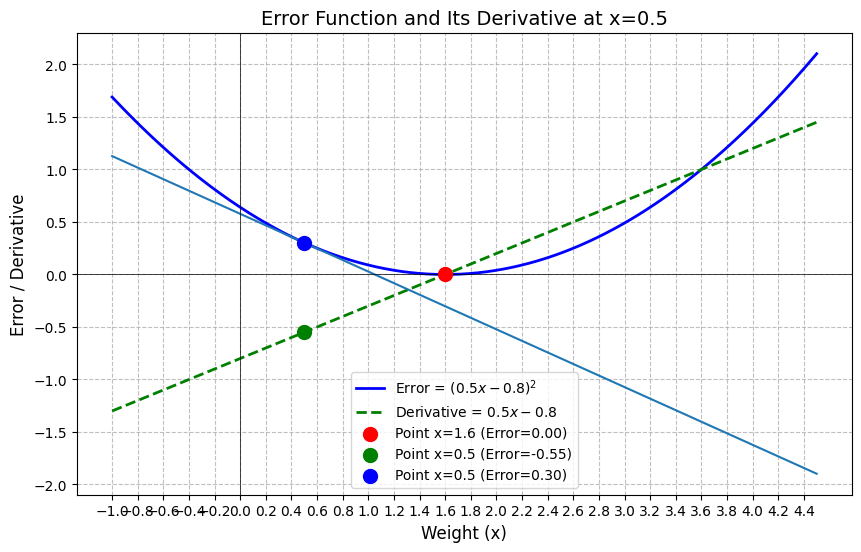

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем функцию ошибки и её производную
def error(x):
    return (0.5 * x - 0.8) ** 2

def derivative(x):
    return 0.5 * x - 0.8  # Производная error(x)

# Создаём диапазон x
x = np.linspace(-1, 4.5, 500)
y_error = error(x)
y_derivative = derivative(x)

# Точка, в которой вычисляем производную (x = 0.5)
x_point = 0.5
y_point = error(x_point)
slope = derivative(x_point)  # Наклон касательной

# Уравнение касательной в точке x = 0.5: y = slope * (x - x_point) + y_point
tangent_line = slope * (x - x_point) + y_point

# Построение графиков
plt.figure(figsize=(10, 6))

# 1. График функции ошибки
plt.plot(x, y_error, 'b-', label="Error = $(0.5x - 0.8)^2$", linewidth=2)

# 2. График производной (линейная функция)
plt.plot(x, y_derivative, 'g--', label="Derivative = $0.5x - 0.8$", linewidth=2)
#Точка пересеения производной с нулем
plt.scatter(0.8/0.5, 0, color='red', s=100, zorder=5, label=f"Point x={0.8/0.5} (Error={0:.2f})")
#Точка значения производной
plt.scatter(x_point, slope , color='green', s=100, zorder=5, label=f"Point x={x_point} (Error={slope:.2f})")


# 3. Точка x = 0.5 и касательная
plt.scatter(x_point, y_point, color= 'blue', s=100, zorder=5, label=f"Point x=0.5 (Error={y_point:.2f})")
plt.plot(x, tangent_line)

# Настройка отображения
plt.xlabel("Weight (x)", fontsize=12)
plt.ylabel("Error / Derivative", fontsize=12)
plt.title("Error Function and Its Derivative at x=0.5", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.8)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.xticks(np.arange(min(x), max(x), 0.2))

plt.legend(fontsize=10)
plt.show()

Текущие веса: ['0.1000', '0.2000', '-0.1000']
Входные данные: toes=8.5, wlrec=0.65, nfans=1.2
Pred: 0.860, Error: 0.020, Delta: -0.140
Весовые дельты: ['-1.190', '-0.091', '-0.168']


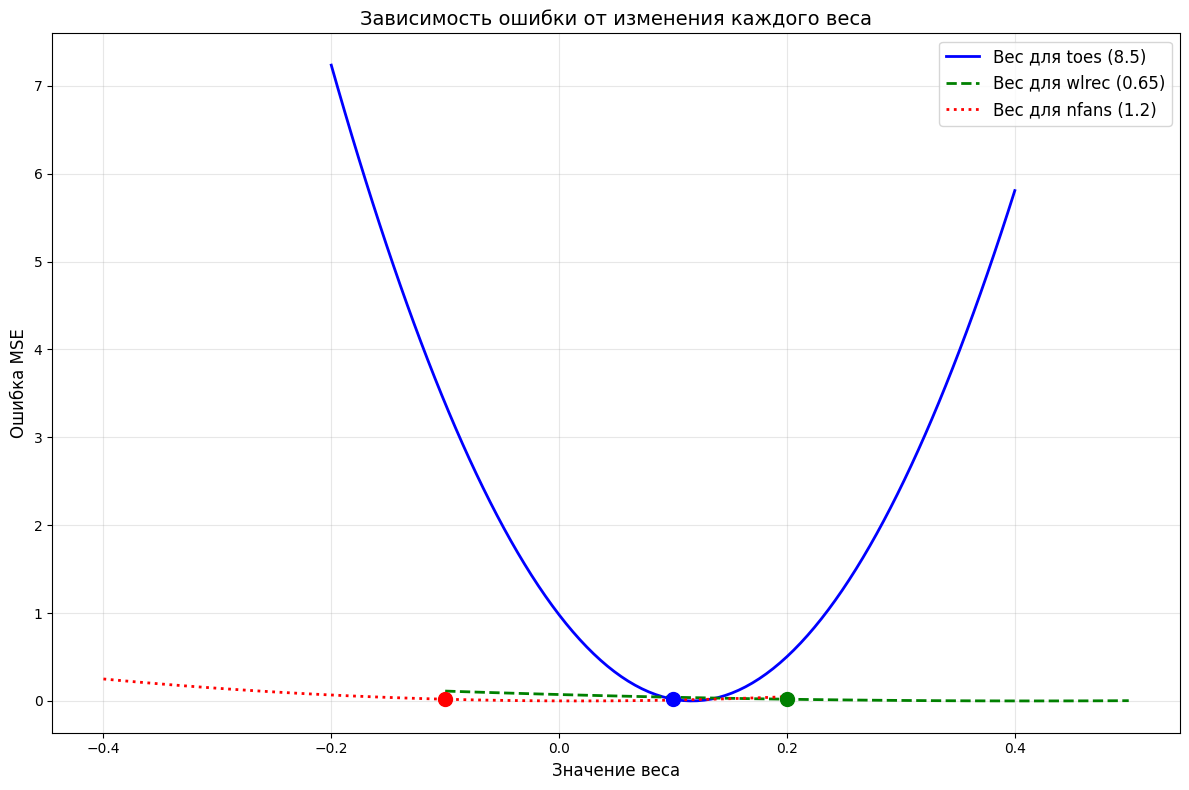

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Ваши функции (оставляем без изменений)
def w_sum(a, b):
    assert(len(a) == len(b))
    output = 0
    for i in range(len(a)):
        output += (a[i] * b[i])
    return output

def neural_network(input, weights):
    pred = w_sum(input, weights)
    return pred

def ele_mul(number, vector):
    output = np.zeros(3)
    assert(len(output) == len(vector))
    for i in range(len(vector)):
        output[i] = number * vector[i]
    return output

# Исходные данные
weights = [0.1, 0.2, -0.1]
toes = [8.50, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.20, 1.3, 0.5, 1.0]
win_or_lose_binary = [1, 1, 0, 1]
alpha = 0.01

true = win_or_lose_binary[0]
input = [toes[0], wlrec[0], nfans[0]]

# Вычисление начальных значений
pred = neural_network(input, weights)
error = (pred - true) ** 2
delta = pred - true
weights_deltas = ele_mul(delta, input)

# Функция для вычисления ошибки при изменении одного веса
def calculate_error(weight_idx, value):
    temp_weights = weights.copy()
    temp_weights[weight_idx] = value
    pred = neural_network(input, temp_weights)
    return (pred - true) ** 2

# Создаем график
plt.figure(figsize=(12, 8))

# Цвета и стили для каждой параболы
colors = ['b', 'g', 'r']
labels = ['Вес для toes (8.5)', 'Вес для wlrec (0.65)', 'Вес для nfans (1.2)']
line_styles = ['-', '--', ':']

# Строим три параболы
for i in range(3):
    # Диапазон значений веса (±0.3 от текущего)
    weight_range = np.linspace(weights[i] - 0.3, weights[i] + 0.3, 100)
    
    # Вычисляем ошибки для каждого значения
    errors = [calculate_error(i, w) for w in weight_range]
    
    # Рисуем параболу
    plt.plot(weight_range, errors, 
             color=colors[i], 
             linestyle=line_styles[i],
             linewidth=2,
             label=labels[i])
    
    # Отмечаем текущее значение веса
    plt.scatter(weights[i], calculate_error(i, weights[i]), 
                color=colors[i], 
                s=100, 
                zorder=5)

# Настраиваем график
plt.xlabel('Значение веса', fontsize=12)
plt.ylabel('Ошибка MSE', fontsize=12)
plt.title('Зависимость ошибки от изменения каждого веса', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()

# Выводим текстовую информацию
print(f"Текущие веса: {[f'{w:.4f}' for w in weights]}")
print(f"Входные данные: toes={input[0]}, wlrec={input[1]}, nfans={input[2]}")
print(f"Pred: {pred:.3f}, Error: {error:.3f}, Delta: {delta:.3f}")
print(f"Весовые дельты: {[f'{d:.3f}' for d in weights_deltas]}")

plt.show()